# Математический анализ в контексте задачи оптимизации. Часть 3

## Введение

### Задание 2.7
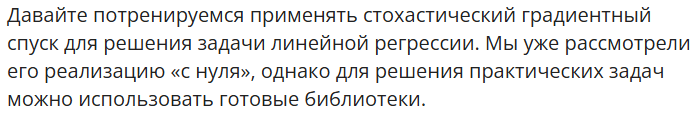

In [23]:
#Загрузим стандартный датасет об алмазах 
import pandas as pd
import numpy as np
import seaborn as sns
df = sns.load_dataset('diamonds')

In [24]:
#Удаляем часть признаков
df.drop(['depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [25]:
#Закодируем категориальные признаки
df = pd.get_dummies(df, drop_first=True)

In [26]:
#Логарифмируем призанки
df['catat'] = np.log(1+df['carat'])
df['price'] = np.log(1+df['price'])

In [27]:
#Определяем целевую переменную и предикторы
X = df.drop(columns='price')
y = df['price']

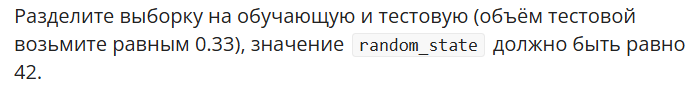

In [44]:
#Подгружаем необходимую библиотеку
from sklearn.model_selection import train_test_split

#Разделяем выбоорку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

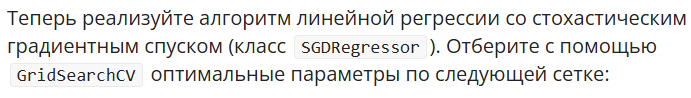

In [46]:
#Подгружаем необходимые библиотеки
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#Делаем словарь гиперпараметров параметров
param_grid = {"loss": ["squared_error", "epsilon_insensitive"],
              "penalty": ["elasticnet"],
              "alpha": np.logspace(-3, 3, 10),
              "l1_ratio": np.linspace(0, 1, 10),
              "learning_rate": ["constant"],
              "eta0": np.logspace(-4, -1, 4)
}

In [47]:
#Используем метод GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(
    estimator= SGDRegressor(random_state=42),
    param_grid=param_grid,
    n_jobs=-1
)

In [48]:
#Обучаем модель стохастического градиентного спуска
#с подобранными гиперпараметрами
grid_search.fit(X_train, y_train)

,estimator,SGDRegressor(random_state=42)
,param_grid,"{'alpha': array([1.0000...00000000e+03]), 'eta0': array([0.0001...01 , 0.1 ]), 'l1_ratio': array([0. ..., 1. ]), 'learning_rate': ['constant'], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'epsilon_insensitive'


In [49]:
#Делаем предсказание
y_pred = grid_search.predict(X_test)

In [50]:
#Подгружаем необходимую библиотеку
from sklearn.metrics import mean_squared_error
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))

MSE: 0.044
